### 1. Load History OHCLV 

Download-data: 
`
freqtrade download-data --config user_data/config.json --timeframe 15m --timerange 20240101-20250101
`

File-like:
`
BTC_USDT-15m.feather
`


In [32]:
import pandas as pd 
import os
import re
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.append('../../')

file_path = '../../../freqtrade/user_data/data/binance/futures'
time_frame = '1d'

def extract_coin_symbols(directory):
    coin_list = []
    pattern = re.compile(r'(.+?)_USDT-1d-futures\.feather$')

    for filename in os.listdir(directory):
        match = pattern.match(filename)
        if match:
            coin_symbol = (match.group(1)+':USDT').replace('_','/')
            coin_list.append(coin_symbol)
    
    return coin_list


if os.path.exists(file_path) and os.path.isdir(file_path):
    coins = extract_coin_symbols(file_path)
print(coins)

['BTC/USDT:USDT', 'ETH/USDT:USDT', 'BNB/USDT:USDT', 'DOGE/USDT:USDT', 'SOL/USDT:USDT', 'XRP/USDT:USDT', '1000PEPE/USDT:USDT', '1000SHIB/USDT:USDT', 'AAVE/USDT:USDT', 'ADA/USDT:USDT', 'ARB/USDT:USDT', 'AVAX/USDT:USDT', 'ENA/USDT:USDT', 'ETC/USDT:USDT', 'FIL/USDT:USDT', 'LINK/USDT:USDT', 'LTC/USDT:USDT', 'NEAR/USDT:USDT', 'SEI/USDT:USDT', 'SUI/USDT:USDT', 'WLD/USDT:USDT', 'XLM/USDT:USDT', 'TRUMP/USDT:USDT', '1000FLOKI/USDT:USDT', '1000SATS/USDT:USDT', 'ACT/USDT:USDT', 'AERGO/USDT:USDT', 'APT/USDT:USDT', 'ATH/USDT:USDT', 'BABY/USDT:USDT', 'BANANAS31/USDT:USDT', 'BANANA/USDT:USDT', 'BANK/USDT:USDT', 'BCH/USDT:USDT', 'BROCCOLI714/USDT:USDT', 'BROCCOLIF3B/USDT:USDT', 'BR/USDT:USDT', 'BTCDOM/USDT:USDT', 'DEEP/USDT:USDT', 'DOT/USDT:USDT', 'EDU/USDT:USDT', 'EPT/USDT:USDT', 'FHE/USDT:USDT', 'FIS/USDT:USDT', 'FORM/USDT:USDT', 'FORTH/USDT:USDT', 'FUN/USDT:USDT', 'GRASS/USDT:USDT', 'GUN/USDT:USDT', 'HBAR/USDT:USDT', 'HIPPO/USDT:USDT', 'HMSTR/USDT:USDT', 'HYPER/USDT:USDT', 'ICP/USDT:USDT', 'INIT/USD

### 2. Pair Filter

In [33]:
top50 = [
"BTC/USDT:USDT","ETH/USDT:USDT","XRP/USDT:USDT","BNB/USDT:USDT","SOL/USDT:USDT","DOGE/USDT:USDT","TRX/USDT:USDT","ADA/USDT:USDT","SUI/USDT:USDT","HYPE/USDT:USDT","LINK/USDT:USDT","AVAX/USDT:USDT","XLM/USDT:USDT","TON/USDT:USDT","BCH/USDT:USDT","HBAR/USDT:USDT","LTC/USDT:USDT","DOT/USDT:USDT","XMR/USDT:USDT","UNI/USDT:USDT","AAVE/USDT:USDT","TAO/USDT:USDT","NEAR/USDT:USDT","APT/USDT:USDT","ONDO/USDT:USDT","ICP/USDT:USDT","ETC/USDT:USDT","KAS/USDT:USDT","POL/USDT:USDT","TRUMP/USDT:USDT","VET/USDT:USDT","RENDER/USDT:USDT","ENA/USDT:USDT","FET/USDT:USDT","WLD/USDT:USDT","ARB/USDT:USDT","FIL/USDT:USDT"
]

top100 = [
"BTC/USDT:USDT","ETH/USDT:USDT","XRP/USDT:USDT","BNB/USDT:USDT","SOL/USDT:USDT","DOGE/USDT:USDT","TRX/USDT:USDT","ADA/USDT:USDT","SUI/USDT:USDT","HYPE/USDT:USDT","LINK/USDT:USDT","AVAX/USDT:USDT","XLM/USDT:USDT","TON/USDT:USDT","BCH/USDT:USDT","HBAR/USDT:USDT","LTC/USDT:USDT","DOT/USDT:USDT","XMR/USDT:USDT","UNI/USDT:USDT","AAVE/USDT:USDT","TAO/USDT:USDT","NEAR/USDT:USDT","APT/USDT:USDT","ONDO/USDT:USDT","ICP/USDT:USDT","ETC/USDT:USDT","KAS/USDT:USDT","POL/USDT:USDT","TRUMP/USDT:USDT","VET/USDT:USDT","RENDER/USDT:USDT","ENA/USDT:USDT","FET/USDT:USDT","WLD/USDT:USDT","ARB/USDT:USDT","FIL/USDT:USDT","ATOM/USDT:USDT","ALGO/USDT:USDT","JUP/USDT:USDT","TIA/USDT:USDT","VIRTUAL/USDT:USDT","INJ/USDT:USDT","QNT/USDT:USDT","STX/USDT:USDT","S/USDT:USDT","DEXE/USDT:USDT","OP/USDT:USDT","FARTCOIN/USDT:USDT","IP/USDT:USDT","FORM/USDT:USDT","SEI/USDT:USDT","A/USDT:USDT","SPX/USDT:USDT","IMX/USDT:USDT","WIF/USDT:USDT","GRT/USDT:USDT","CRV/USDT:USDT","LDO/USDT:USDT","ZEC/USDT:USDT","ENS/USDT:USDT","JASMY/USDT:USDT","THETA/USDT:USDT","CAKE/USDT:USDT","GALA/USDT:USDT","WAL/USDT:USDT","SAND/USDT:USDT","IOTA/USDT:USDT","PYTH/USDT:USDT","PENGU/USDT:USDT","BSV/USDT:USDT","PENDLE/USDT:USDT","KAIA/USDT:USDT"
]

top150 = [
"BTC/USDT:USDT","ETH/USDT:USDT","XRP/USDT:USDT","BNB/USDT:USDT","SOL/USDT:USDT","DOGE/USDT:USDT","TRX/USDT:USDT","ADA/USDT:USDT","SUI/USDT:USDT","HYPE/USDT:USDT","LINK/USDT:USDT","AVAX/USDT:USDT","XLM/USDT:USDT","TON/USDT:USDT","BCH/USDT:USDT","HBAR/USDT:USDT","LTC/USDT:USDT","DOT/USDT:USDT","XMR/USDT:USDT","UNI/USDT:USDT","AAVE/USDT:USDT","TAO/USDT:USDT","NEAR/USDT:USDT","APT/USDT:USDT","ONDO/USDT:USDT","ICP/USDT:USDT","ETC/USDT:USDT","KAS/USDT:USDT","POL/USDT:USDT","TRUMP/USDT:USDT","VET/USDT:USDT","RENDER/USDT:USDT","ENA/USDT:USDT","FET/USDT:USDT","WLD/USDT:USDT","ARB/USDT:USDT","FIL/USDT:USDT","ATOM/USDT:USDT","ALGO/USDT:USDT","JUP/USDT:USDT","TIA/USDT:USDT","VIRTUAL/USDT:USDT","INJ/USDT:USDT","QNT/USDT:USDT","STX/USDT:USDT","S/USDT:USDT","DEXE/USDT:USDT","OP/USDT:USDT","FARTCOIN/USDT:USDT","IP/USDT:USDT","FORM/USDT:USDT","SEI/USDT:USDT","A/USDT:USDT","SPX/USDT:USDT","IMX/USDT:USDT","WIF/USDT:USDT","GRT/USDT:USDT","CRV/USDT:USDT","LDO/USDT:USDT","ZEC/USDT:USDT","ENS/USDT:USDT","JASMY/USDT:USDT","THETA/USDT:USDT","CAKE/USDT:USDT","GALA/USDT:USDT","WAL/USDT:USDT","SAND/USDT:USDT","IOTA/USDT:USDT","PYTH/USDT:USDT","PENGU/USDT:USDT","BSV/USDT:USDT","PENDLE/USDT:USDT","KAIA/USDT:USDT","XTZ/USDT:USDT","RUNE/USDT:USDT","FLOW/USDT:USDT","BRETT/USDT:USDT","ZKJ/USDT:USDT","JTO/USDT:USDT","XCN/USDT:USDT","MANA/USDT:USDT","APE/USDT:USDT","KAITO/USDT:USDT","DEEP/USDT:USDT","ATH/USDT:USDT","GRASS/USDT:USDT","EIGEN/USDT:USDT","EGLD/USDT:USDT","DYDX/USDT:USDT","AR/USDT:USDT","AERO/USDT:USDT","STRK/USDT:USDT","KAVA/USDT:USDT","NEO/USDT:USDT","AXS/USDT:USDT","RSR/USDT:USDT","SUPER/USDT:USDT","LPT/USDT:USDT","ETHFI/USDT:USDT","W/USDT:USDT","CFX/USDT:USDT","SYRUP/USDT:USDT","CHZ/USDT:USDT","MOVE/USDT:USDT","POPCAT/USDT:USDT","MORPHO/USDT:USDT","COMP/USDT:USDT","SAFE/USDT:USDT","SUN/USDT:USDT"
]

top200 = [
"BTC/USDT:USDT","ETH/USDT:USDT","XRP/USDT:USDT","BNB/USDT:USDT","SOL/USDT:USDT","DOGE/USDT:USDT","TRX/USDT:USDT","ADA/USDT:USDT","SUI/USDT:USDT","HYPE/USDT:USDT","LINK/USDT:USDT","AVAX/USDT:USDT","XLM/USDT:USDT","TON/USDT:USDT","BCH/USDT:USDT","HBAR/USDT:USDT","LTC/USDT:USDT","DOT/USDT:USDT","XMR/USDT:USDT","UNI/USDT:USDT","AAVE/USDT:USDT","TAO/USDT:USDT","NEAR/USDT:USDT","APT/USDT:USDT","ONDO/USDT:USDT","ICP/USDT:USDT","ETC/USDT:USDT","KAS/USDT:USDT","POL/USDT:USDT","TRUMP/USDT:USDT","VET/USDT:USDT","RENDER/USDT:USDT","ENA/USDT:USDT","FET/USDT:USDT","WLD/USDT:USDT","ARB/USDT:USDT","FIL/USDT:USDT","ATOM/USDT:USDT","ALGO/USDT:USDT","JUP/USDT:USDT","TIA/USDT:USDT","VIRTUAL/USDT:USDT","INJ/USDT:USDT","QNT/USDT:USDT","STX/USDT:USDT","S/USDT:USDT","DEXE/USDT:USDT","OP/USDT:USDT","FARTCOIN/USDT:USDT","IP/USDT:USDT","FORM/USDT:USDT","SEI/USDT:USDT","A/USDT:USDT","SPX/USDT:USDT","IMX/USDT:USDT","WIF/USDT:USDT","GRT/USDT:USDT","CRV/USDT:USDT","LDO/USDT:USDT","ZEC/USDT:USDT","ENS/USDT:USDT","JASMY/USDT:USDT","THETA/USDT:USDT","CAKE/USDT:USDT","GALA/USDT:USDT","WAL/USDT:USDT","SAND/USDT:USDT","IOTA/USDT:USDT","PYTH/USDT:USDT","PENGU/USDT:USDT","BSV/USDT:USDT","PENDLE/USDT:USDT","KAIA/USDT:USDT","XTZ/USDT:USDT","RUNE/USDT:USDT","FLOW/USDT:USDT","BRETT/USDT:USDT","ZKJ/USDT:USDT","JTO/USDT:USDT","XCN/USDT:USDT","MANA/USDT:USDT","APE/USDT:USDT","KAITO/USDT:USDT","DEEP/USDT:USDT","ATH/USDT:USDT","GRASS/USDT:USDT","EIGEN/USDT:USDT","EGLD/USDT:USDT","DYDX/USDT:USDT","AR/USDT:USDT","AERO/USDT:USDT","STRK/USDT:USDT","KAVA/USDT:USDT","NEO/USDT:USDT","AXS/USDT:USDT","RSR/USDT:USDT","SUPER/USDT:USDT","LPT/USDT:USDT","ETHFI/USDT:USDT","W/USDT:USDT","CFX/USDT:USDT","SYRUP/USDT:USDT","CHZ/USDT:USDT","MOVE/USDT:USDT","POPCAT/USDT:USDT","MORPHO/USDT:USDT","COMP/USDT:USDT","SAFE/USDT:USDT","SUN/USDT:USDT","TWT/USDT:USDT","JST/USDT:USDT","AKT/USDT:USDT","OM/USDT:USDT","AXL/USDT:USDT","TURBO/USDT:USDT","BERA/USDT:USDT","1INCH/USDT:USDT","MEW/USDT:USDT","MINA/USDT:USDT","KSM/USDT:USDT","AI16Z/USDT:USDT","DASH/USDT:USDT","PNUT/USDT:USDT","ZRO/USDT:USDT","NXPC/USDT:USDT","SFP/USDT:USDT","NOT/USDT:USDT","SNX/USDT:USDT","GLM/USDT:USDT","ROSE/USDT:USDT","ZIL/USDT:USDT","MOCA/USDT:USDT","MASK/USDT:USDT","BLUR/USDT:USDT","QTUM/USDT:USDT","CKB/USDT:USDT","MOODENG/USDT:USDT","ASTR/USDT:USDT","ZK/USDT:USDT","ZRX/USDT:USDT","GAS/USDT:USDT","ORDI/USDT:USDT","BAT/USDT:USDT","VANA/USDT:USDT","ACH/USDT:USDT"
]

import random
random200 = random.sample(coins, 200)

target_coins = top50
print(target_coins)

['BTC/USDT:USDT', 'ETH/USDT:USDT', 'XRP/USDT:USDT', 'BNB/USDT:USDT', 'SOL/USDT:USDT', 'DOGE/USDT:USDT', 'TRX/USDT:USDT', 'ADA/USDT:USDT', 'SUI/USDT:USDT', 'HYPE/USDT:USDT', 'LINK/USDT:USDT', 'AVAX/USDT:USDT', 'XLM/USDT:USDT', 'TON/USDT:USDT', 'BCH/USDT:USDT', 'HBAR/USDT:USDT', 'LTC/USDT:USDT', 'DOT/USDT:USDT', 'XMR/USDT:USDT', 'UNI/USDT:USDT', 'AAVE/USDT:USDT', 'TAO/USDT:USDT', 'NEAR/USDT:USDT', 'APT/USDT:USDT', 'ONDO/USDT:USDT', 'ICP/USDT:USDT', 'ETC/USDT:USDT', 'KAS/USDT:USDT', 'POL/USDT:USDT', 'TRUMP/USDT:USDT', 'VET/USDT:USDT', 'RENDER/USDT:USDT', 'ENA/USDT:USDT', 'FET/USDT:USDT', 'WLD/USDT:USDT', 'ARB/USDT:USDT', 'FIL/USDT:USDT']


### 3. Load History OHLCV 

In [34]:
def extract_coin_data(directory):
    coin_list = {}
    symbols = []
    pattern = re.compile(r'(.+?)_USDT-1d-futures\.feather$')

    for filename in os.listdir(directory):
        match = pattern.match(filename)
        if match:
            coin_symbol = (match.group(1)+':USDT').replace('_','/')
            if coin_symbol in target_coins: 
                df = pd.read_feather(f'{directory}/{filename}')
                df = df.reset_index(drop=True)
                if len(df) > 0 :
                    coin_list[coin_symbol] = df
                    symbols.append(coin_symbol)
    
    return coin_list,symbols

if os.path.exists(file_path) and os.path.isdir(file_path):
    coins,symbols = extract_coin_data(file_path)
print(len(coins))

36


### 3. History Data Transform

In [35]:
import pandas as pd
close_dfs = []
open_dfs = []
high_dfs = []
low_dfs = []
volume_dfs = []


for symbol, df in coins.items():
    
    temp_df = df[['date', 'close']].copy()
    temp_df['date'] = pd.to_datetime(temp_df['date'])
    temp_df = temp_df.set_index('date')  # 将date设为索引
    # temp_df.index = temp_df.index.tz_localize(None)
    temp_df.columns = [symbol]  
    close_dfs.append(temp_df)



    temp_df = df[['date', 'open']].copy()
    temp_df['date'] = pd.to_datetime(temp_df['date'])
    temp_df = temp_df.set_index('date')  # 将date设为索引
    # temp_df.index = temp_df.index.tz_localize(None)
    temp_df.columns = [symbol]  
    open_dfs.append(temp_df)


    temp_df = df[['date', 'high']].copy()
    temp_df['date'] = pd.to_datetime(temp_df['date'])
    temp_df = temp_df.set_index('date')  # 将date设为索引
    # temp_df.index = temp_df.index.tz_localize(None)
    temp_df.columns = [symbol]  
    high_dfs.append(temp_df)
    

    temp_df = df[['date', 'low']].copy()
    temp_df['date'] = pd.to_datetime(temp_df['date'])
    temp_df = temp_df.set_index('date')  # 将date设为索引
    # temp_df.index = temp_df.index.tz_localize(None)
    temp_df.columns = [symbol]  
    low_dfs.append(temp_df)

    temp_df = df[['date', 'volume']].copy()
    temp_df['date'] = pd.to_datetime(temp_df['date'])
    temp_df = temp_df.set_index('date')  # 将date设为索引
    # temp_df.index = temp_df.index.tz_localize(None)
    temp_df.columns = [symbol]  
    volume_dfs.append(temp_df)



close = pd.concat(close_dfs, axis=1)
open = pd.concat(open_dfs, axis=1)
high = pd.concat(high_dfs, axis=1)
low = pd.concat(low_dfs, axis=1)
volume = pd.concat(volume_dfs, axis=1)
amount = close.mul(volume, fill_value=1)
vwap = (high + low + close + open) / 4


### 4. OHLCV Filter

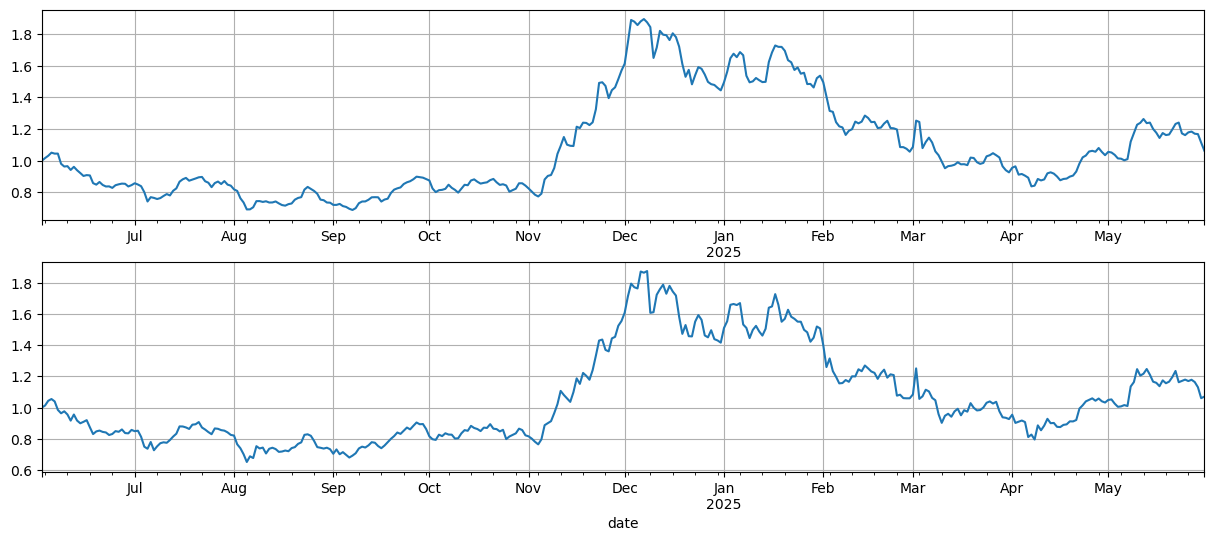

In [36]:
start_time = '2024-06-01'
end_time = '2025-06-01'
close_filter = close[(close.index > start_time) & (close.index < end_time)]
open_filter = open[(open.index > start_time) & (open.index < end_time)]
high_filter = high[(high.index > start_time) & (high.index < end_time)]
low_filter = low[(low.index > start_time) & (low.index < end_time)]
volume_filter = volume[(volume.index > start_time) & (volume.index < end_time)]
amount_filter = amount[(amount.index > start_time) & (amount.index < end_time)]
vwap_filter = vwap[(vwap.index > start_time) & (vwap.index < end_time)]
benchmark_open_filter = open_filter.mean(axis=1)
benchmark_close_filter = close_filter.mean(axis=1)


import matplotlib.pyplot as plt
_, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
high_norm = high_filter/high_filter.bfill().iloc[0] 
close_norm = close_filter/close_filter.bfill().iloc[0] 
high_norm.mean(axis=1).plot(ax=ax1, figsize=(15,6),grid=True)
close_norm.mean(axis=1).plot(ax=ax2, figsize=(15,6),grid=True);

### 5. Define Factor

In [37]:
import utils.Alpha191 as alpha191

df_data = {
    'open' : open_filter,
    'close' : close_filter,
    'high' : high_filter,
    'low' : low_filter,
    'volume' : volume_filter, 
    'vwap' : vwap_filter,
    'amount': amount_filter,
    'benchmark_open': benchmark_open_filter,
    'benchmark_close': benchmark_close_filter
}

alpha_all_in_one_191 = alpha191.Alphas191(df_data)


import utils.Alpha101 as alpha101

df_data = {
    'open' : open_filter,
    'close' : close_filter,
    'high' : high_filter,
    'low' : low_filter,
    'volume' : volume_filter, 
}

alpha_all_in_one_101 = alpha101.Alphas101(df_data)



### 6. AlphaLens Data Adaptor

Dropped 0.3% entries from factor data: 0.3% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-0.072417,0.010666,-0.010895,0.010596,1296,11.492418
2,-0.032988,0.014062,-0.005582,0.007758,1066,9.452869
3,-0.025090,0.018343,-0.003533,0.007579,1099,9.745500
4,-0.021788,0.019977,-0.002122,0.007222,1115,9.887381
5,-0.019239,0.021910,-0.000860,0.007565,1153,10.224350
6,-0.017733,0.026540,0.000110,0.007288,1066,9.452869
7,-0.016947,0.027150,0.001321,0.007354,1021,9.053826
8,-0.014928,0.029484,0.002791,0.007712,1193,10.579055
9,-0.013605,0.033285,0.004750,0.007958,972,8.619314


Returns Analysis


,1D
Ann. alpha,-0.087
beta,-0.036
Mean Period Wise Return Top Quantile (bps),1.386
Mean Period Wise Return Bottom Quantile (bps),6.839
Mean Period Wise Spread (bps),-5.453


<Figure size 640x480 with 0 Axes>

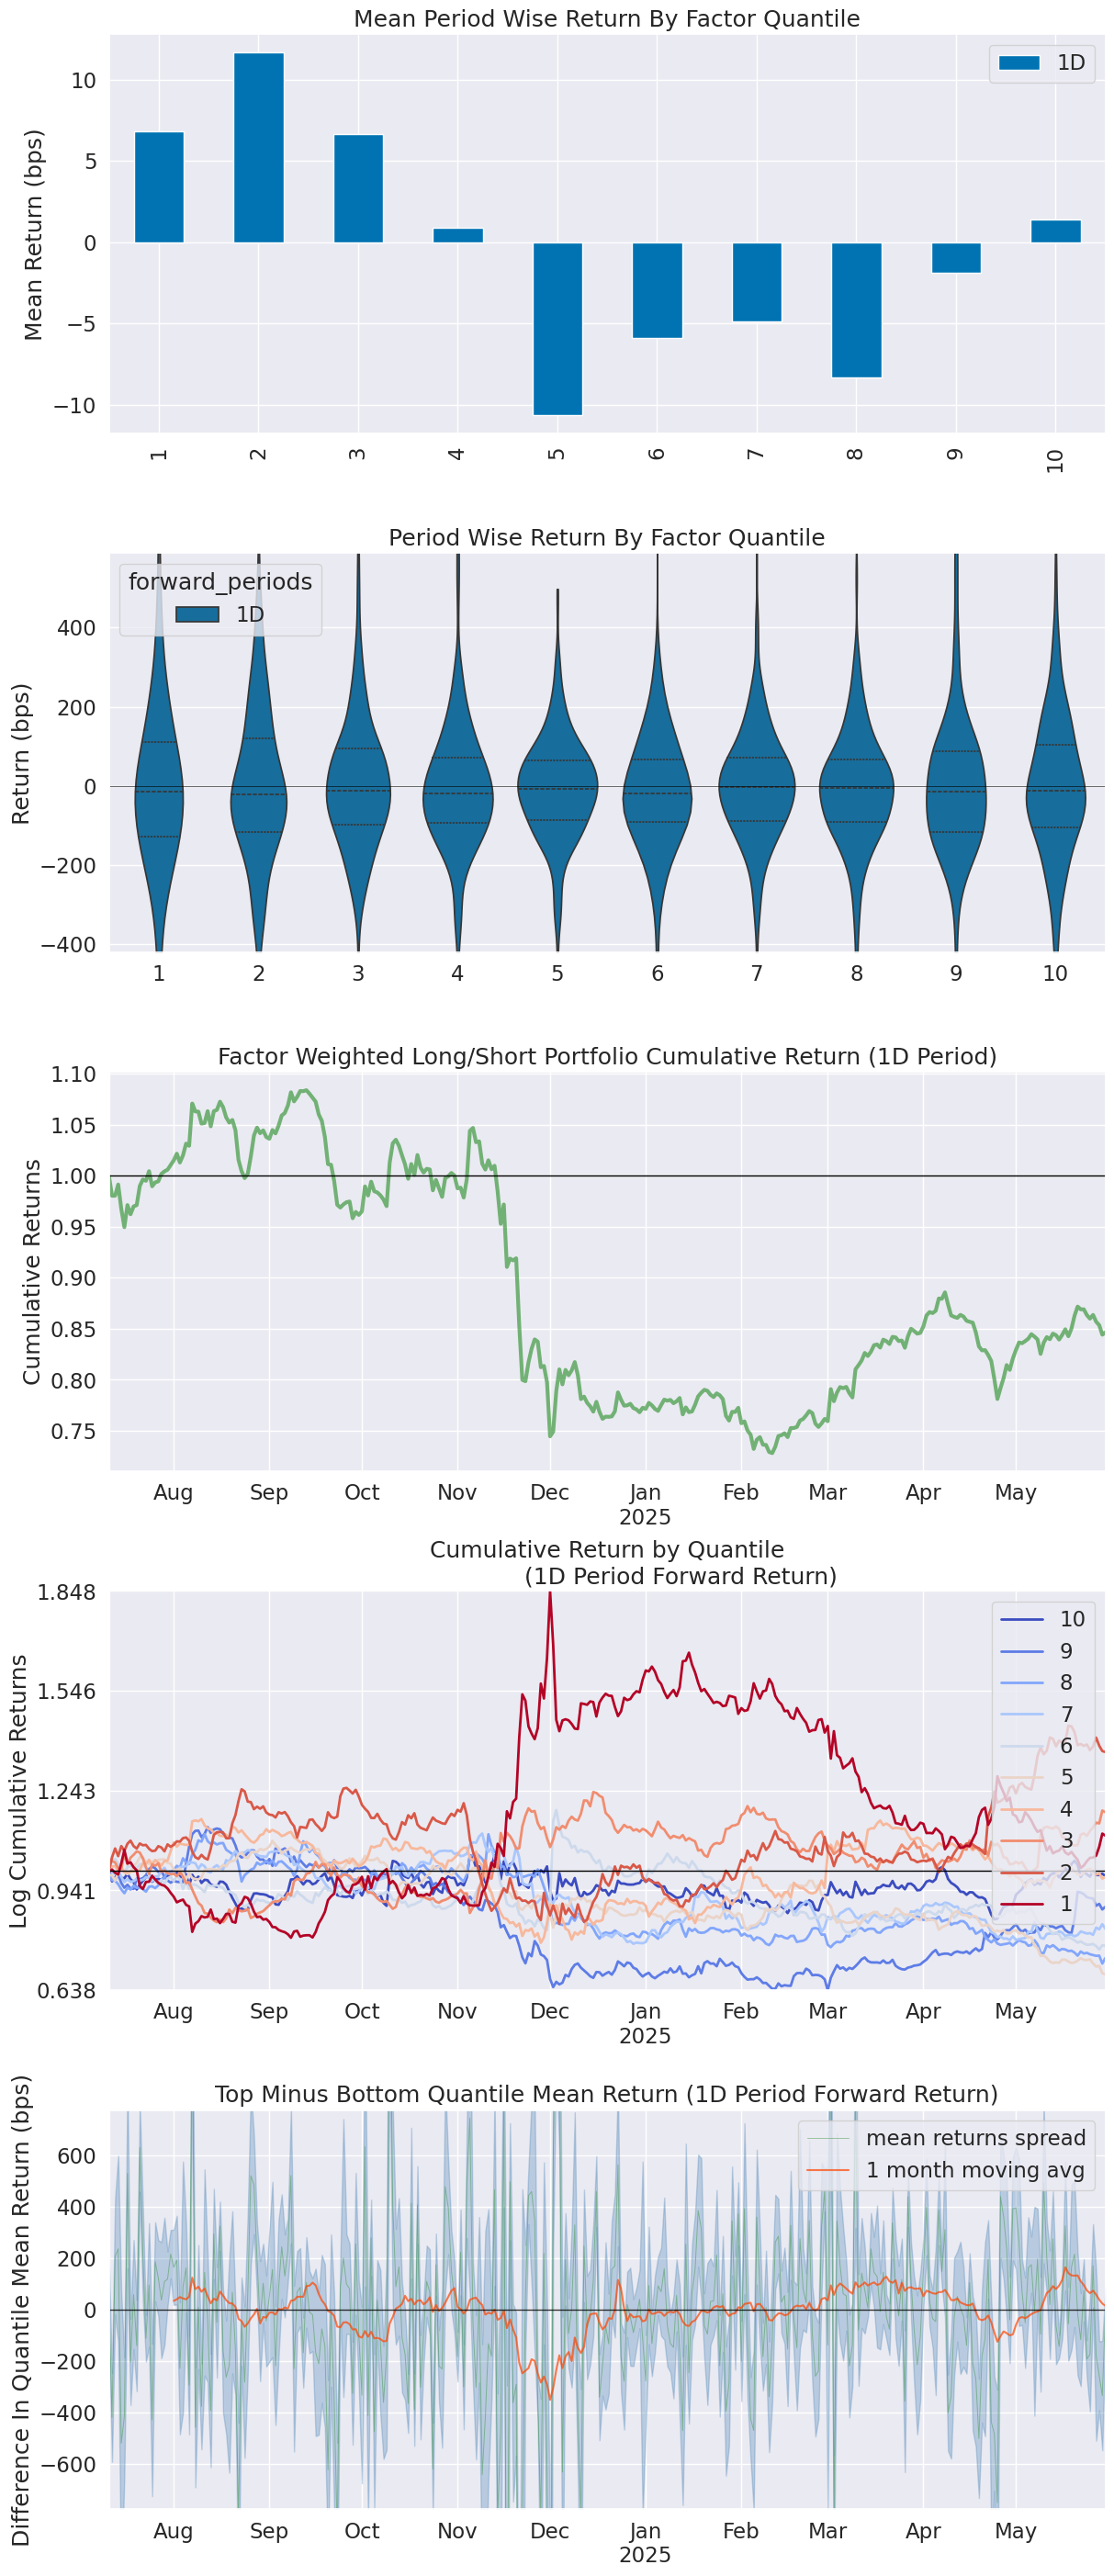

Information Analysis


,1D
IC Mean,0.015
IC Std.,0.240
Risk-Adjusted IC,0.064
t-stat(IC),1.160
p-value(IC),0.247
IC Skew,0.026
IC Kurtosis,-0.174


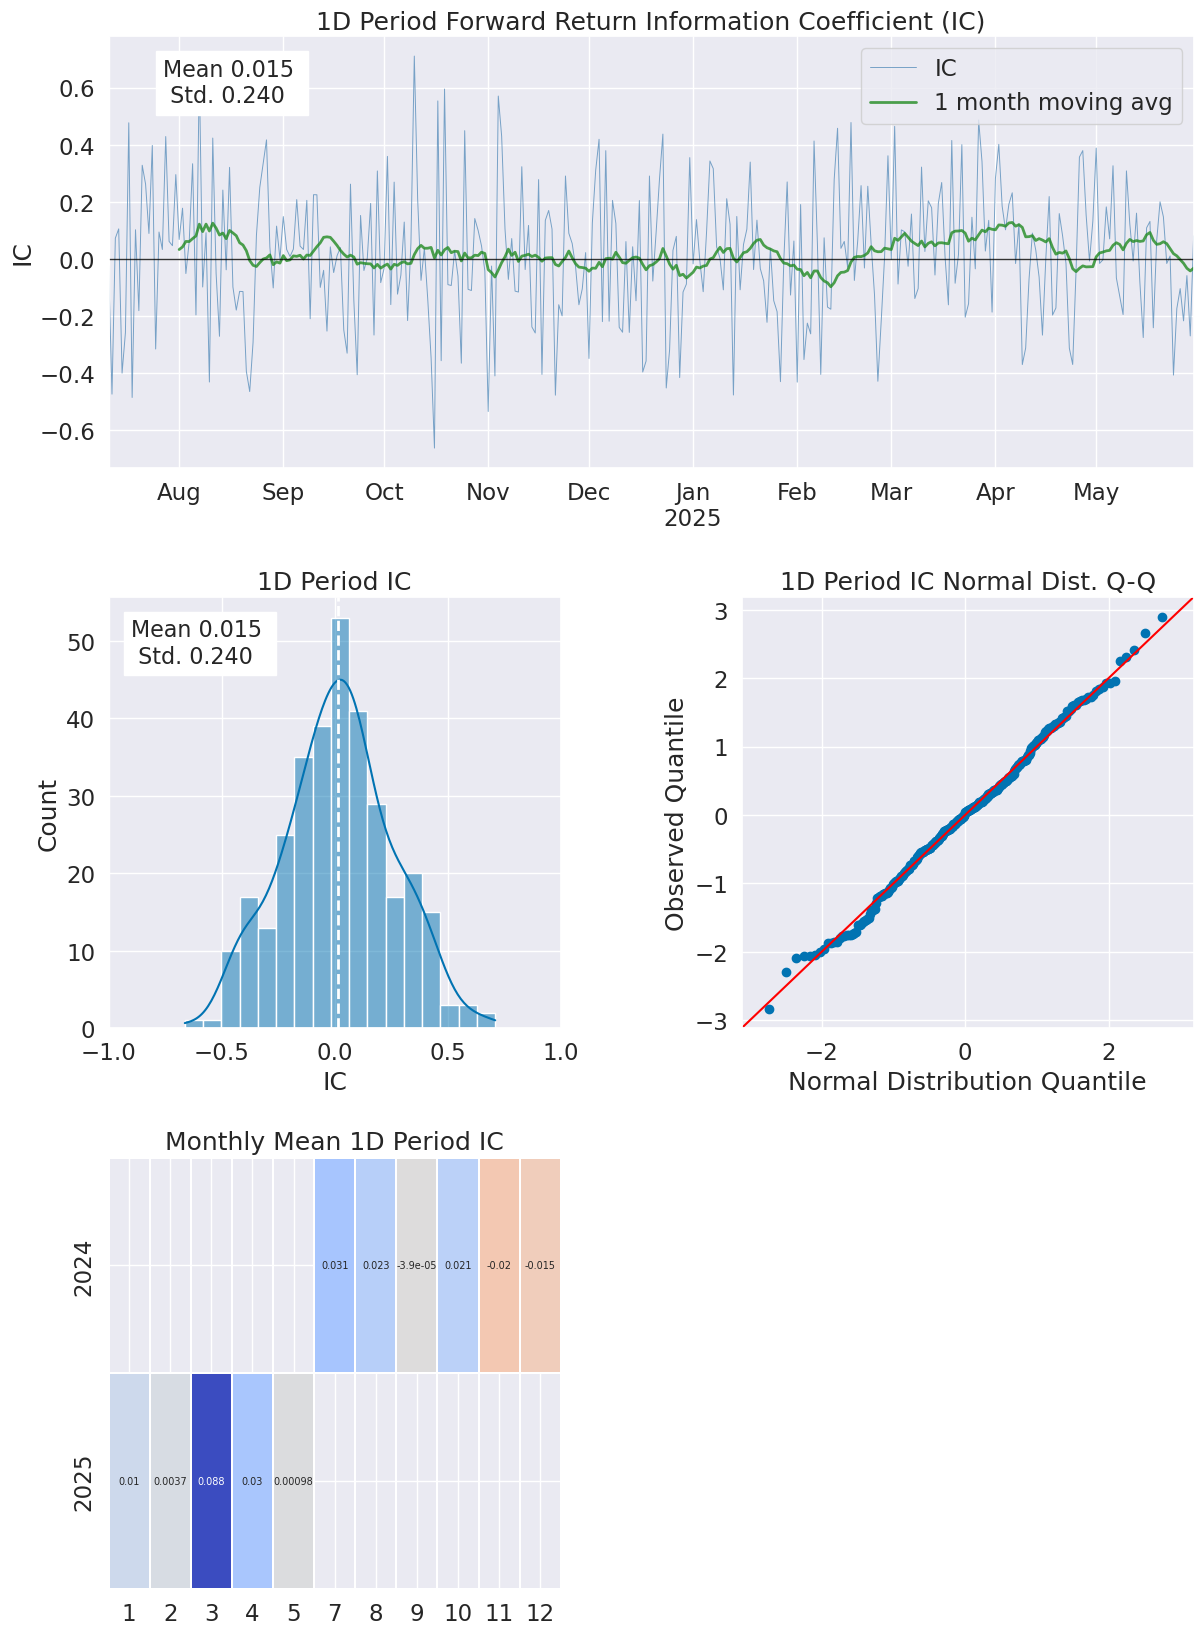

Turnover Analysis


,1D
Quantile 1 Mean Turnover,0.266
Quantile 2 Mean Turnover,0.590
Quantile 3 Mean Turnover,0.640
Quantile 4 Mean Turnover,0.708
Quantile 5 Mean Turnover,0.722
Quantile 6 Mean Turnover,0.712
Quantile 7 Mean Turnover,0.715
Quantile 8 Mean Turnover,0.640
Quantile 9 Mean Turnover,0.630
Quantile 10 Mean Turnover,0.258


,1D
Mean Factor Rank Autocorrelation,0.891


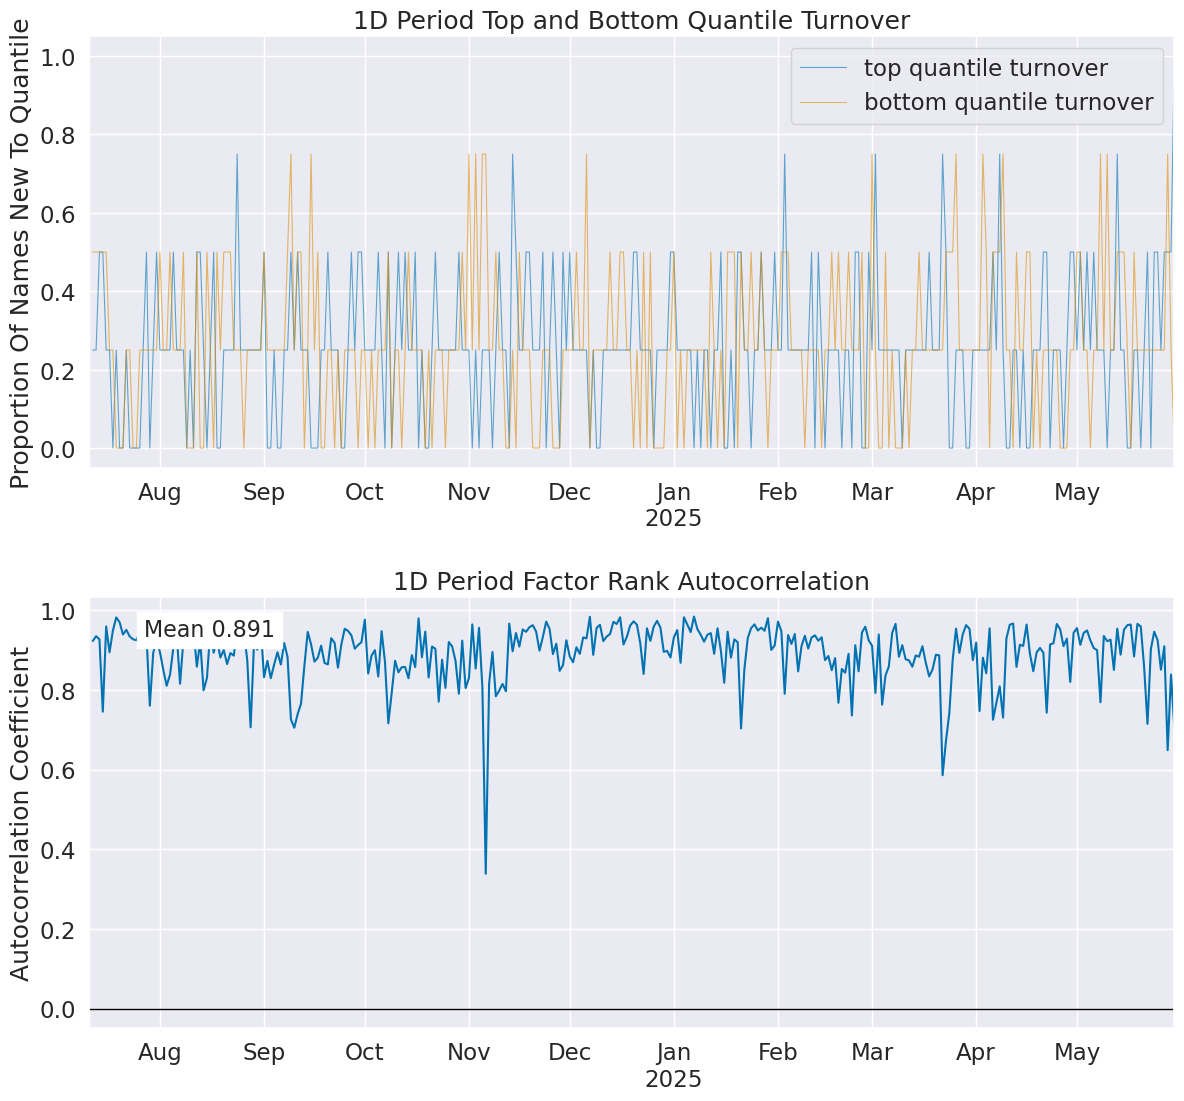

In [38]:
method = getattr(alpha_all_in_one_191, 'alpha166')
single_alpha = method() 


# 将因子转换为Alphalens需要的MultiIndex格式
factor = single_alpha.stack()
factor.index.names = ['date', 'asset']
factor = factor.dropna()  # 清理缺失值
price = close_filter

import alphalens
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
    factor=factor,
    prices=price,
    periods=(1,),
    quantiles=10 
)
factor_data

alphalens.tears.create_full_tear_sheet(
    factor_data,
    long_short=True,
)
